In [7]:
import os
import pandas as pd

In [12]:
# 파일명 변경

folder_names = os.listdir('./data/')

for folder_name in folder_names:
    file_names = os.listdir(f'./data/{folder_name}')
    for file_name in file_names:
        split_file_name = file_name.replace('.csv','').split('_')
        os.rename(f'./data/{folder_name}/{file_name}',f'./data/{folder_name}/{folder_name}_{split_file_name[1]}.csv')

### 데이터프레임 합치기
### 관광지 기본정보

In [ ]:
folder_names = os.listdir('./data/')
folder_names

In [3]:
basic_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_관광지 기본정보.csv',encoding='ANSI')
    basic_info = pd.concat([basic_info,df],ignore_index=True)

In [4]:
basic_info

,관광지명,주소,평균 체류시간
0,168계단,부산광역시 동구,3시간 4분
1,40계단문화관광테마거리,부산광역시 중구,1시간 36분
2,BIFF광장,부산광역시 중구,1시간 22분
3,KT&G상상마당부산,부산광역시 부산진구,1시간 28분
4,SEALIFE부산아쿠아리움,부산광역시 해운대구,0시간 59분
...,...,...,...
234,화명수목원,부산광역시 북구,1시간 8분
235,화전공원,부산광역시 강서구,2시간 53분
236,황령산,부산광역시 부산진구,2시간 1분
237,황령산전망대,부산광역시 남구,0시간 38분


In [223]:
basic_info.to_csv('./basic_info.csv',encoding='utf-8')

### 데이터프레임 합치기

### 내비게이션

In [176]:
folder_names = os.listdir('./zipfile/data/')
len(folder_names)

239

In [177]:
navi_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./zipfile/data/{folder_name}/{folder_name}_내비게이션 목적지 검색량 추이.csv',encoding='ANSI',index_col=0)
    df = df.rename(columns={df.columns[0] : folder_name}).transpose()
    df['관광지명'] = folder_name
    navi_info = pd.concat([navi_info,df])

In [178]:
navi_info.to_csv('./data_2/navi_info.csv',encoding='utf-8',index=False)

In [5]:
navi_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_내비게이션 목적지 검색량 추이.csv',encoding='ANSI',index_col=0)
    df = df.rename(columns={df.columns[0] : folder_name}).transpose()
    navi_info = pd.concat([navi_info,df])

In [179]:
navi_info

,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312,관광지명
168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0,168계단
40계단문화관광테마거리,16.0,31.0,33.0,NaN,NaN,6.0,NaN,16.0,40.0,35.0,59.0,29.0,40계단문화관광테마거리
BIFF광장,398.0,397.0,278.0,NaN,NaN,29.0,8.0,112.0,321.0,444.0,327.0,480.0,BIFF광장
KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0,KT&G상상마당부산
SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0,SEALIFE부산아쿠아리움
...,...,...,...,...,...,...,...,...,...,...,...,...,...
화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0,화명수목원
화전공원,32.0,38.0,25.0,NaN,NaN,19.0,NaN,22.0,24.0,34.0,50.0,22.0,화전공원
황령산,425.0,416.0,569.0,NaN,NaN,66.0,22.0,148.0,500.0,608.0,527.0,449.0,황령산
황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0,황령산전망대


In [7]:
navi_info.to_csv('./navi_info.csv',encoding='utf-8',index=False)

### 데이터프레임 합치기
### 방문자 거주지별 분포

In [8]:

new_order = ['관광지명','광역지자체명', '기초지자체명', '광역지자체별 거주 방문자 비율', '기초지자체별 거주 방문자 비율']

visit_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./data/{folder_name}/{folder_name}_방문자 거주지별 분포.csv',encoding='ANSI')
    df['관광지명'] = folder_name
    df = df[new_order]
    
    visit_info = pd.concat([visit_info,df],ignore_index=True)

In [12]:
visit_info

,관광지명,광역지자체명,기초지자체명,광역지자체별 거주 방문자 비율,기초지자체별 거주 방문자 비율
0,168계단,강원특별자치도,평창군,0.6,6.4
1,168계단,강원특별자치도,태백시,0.6,5.7
2,168계단,강원특별자치도,삼척시,0.6,25.8
3,168계단,강원특별자치도,강릉시,0.6,8.2
4,168계단,강원특별자치도,영월군,0.6,0.4
...,...,...,...,...,...
56694,흰여울문화마을,충청북도,옥천군,2.1,2.9
56695,흰여울문화마을,충청북도,증평군,2.1,2.1
56696,흰여울문화마을,충청북도,괴산군,2.1,1.3
56697,흰여울문화마을,충청북도,단양군,2.1,0.9


In [10]:
visit_info.to_csv('./visit_info.csv',encoding='utf-8',index=False)

### 데이터프레임 합치기
### 성별

In [ ]:
folder_names = os.listdir('./busan_zipfile/data/')
len(folder_names)

In [59]:
new_order = ['관광지명','연령대', '남성방문 비율', '여성방문 비율']

gender_info = pd.DataFrame()

for folder_name in folder_names:
    df = pd.read_csv(f'./busan_zipfile/data/{folder_name}/{folder_name}_성·연령별 방문자.csv',encoding='ANSI')
    df['관광지명'] = folder_name
    df = df[new_order]
    
    gender_info = pd.concat([gender_info,df],ignore_index=True)

In [60]:
gender_info

,관광지명,연령대,남성방문 비율,여성방문 비율
0,168계단,70세 이상,7.1,8.4
1,168계단,60~69세,8.5,8.6
2,168계단,50~59세,8.6,10.3
3,168계단,40~49세,7.1,7.7
4,168계단,30~39세,6.8,5.9
...,...,...,...,...
1906,흰여울문화마을,40~49세,4.8,6.6
1907,흰여울문화마을,30~39세,8.0,8.8
1908,흰여울문화마을,20~29세,12.2,20.6
1909,흰여울문화마을,10~19세,2.6,4.3


In [61]:
gender_info.to_csv('./data_2/gender_info.csv',encoding='utf-8',index=False)

==================================================================================================

==================================================================================================

==================================================================================================

In [4]:
import pandas as pd

basic_info = pd.read_csv('./data_2/basic_info.csv')
basic_info

,Unnamed: 0,관광지명,주소,평균 체류시간
0,0,168계단,부산광역시 동구,3시간 4분
1,1,40계단문화관광테마거리,부산광역시 중구,1시간 36분
2,2,BIFF광장,부산광역시 중구,1시간 22분
3,3,KT&G상상마당부산,부산광역시 부산진구,1시간 28분
4,4,SEALIFE부산아쿠아리움,부산광역시 해운대구,0시간 59분
...,...,...,...,...
234,234,화명수목원,부산광역시 북구,1시간 8분
235,235,화전공원,부산광역시 강서구,2시간 53분
236,236,황령산,부산광역시 부산진구,2시간 1분
237,237,황령산전망대,부산광역시 남구,0시간 38분


In [5]:
stars = []
reviews = []

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service


for i in basic_info['관광지명']:
    url = f'https://www.google.co.kr/maps/search/{i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    
    try:
        # 해당 클래스명이 나타날 때까지 최대 10초 대기
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'F7nice'))
        )
        
        star = element.text.split('\n')[0]
        review = element.text.split('\n')[1][1:-1]
        
        stars.append(star)
        reviews.append(review)
    except:
        check = input('일치하는 장소를 클릭 후 y를 눌러주세요(이외 None)')
        if check.upper() == 'Y':
            star = driver.find_element(By.CLASS_NAME, 'F7nice').text.split('\n')[0]
            review = driver.find_element(By.CLASS_NAME, 'F7nice').text.split('\n')[1][1:-1]
            
            stars.append(star)
            reviews.append(review)
        else:
            stars.append(None)
            reviews.append(None)
    
    driver.quit()
    print(f'평점 수 : {len(stars)}','|',f'리뷰 수 : {len(reviews)}','|',f'관광지 명 : {i}','|', f'별점 : {star}','|',f'리뷰 : {review}')
    
    star = None
    review = None

In [8]:
print(f'총 데이터 수 : {len(basic_info)}')
print('=========================================')
print(f'평점 수 : {len(stars)}')
print(f'리뷰 수 : {len(reviews)}')
print('=========================================')
print(f'총 None값 수 : {stars.count(None)}')
print(f'총 None값 수 : {reviews.count(None)}')

총 데이터 수 : 239
평점 수 : 239
리뷰 수 : 239
총 None값 수 : 6
총 None값 수 : 6


In [11]:
basic_info['stars'] = stars
basic_info['reviews'] = reviews

In [18]:
basic_info = basic_info.drop('Unnamed: 0',axis=1)

In [22]:
basic_info.to_csv('./basic_info_with_reviews.csv',encoding='utf-8',index=False)

==============================================================================================================================

==============================================================================================================================

==============================================================================================================================

### 리뷰, 체류시간 -> 숫자 값으로 변경

In [181]:
import pandas as pd

basic_info = pd.read_csv('./data_2/basic_info_with_reviews.csv')
gender_info = pd.read_csv('./data_2/gender_info.csv')
navi_info = pd.read_csv('./data_2/navi_info.csv')
visit_info = pd.read_csv('./data_2/visit_info.csv')

In [46]:
time = []

for i in basic_info['평균 체류시간']:
    i = i.replace('시간','').replace('분','').strip()
    i = i.split(' ')
    time.append((int(i[0]) * 60) + int(i[1]))
    
basic_info['평균 체류시간'] = time

In [69]:
reviews_to_int = []

for i in basic_info['reviews']:
    if type(i) == float:
        reviews_to_int.append(i)
    else:
        i = i.replace(',','')
        i = int(i)
        reviews_to_int.append(i)

basic_info['reviews'] = reviews_to_int

In [76]:
basic_info.to_csv('./data_2/basic_info_with_reviews.csv',encoding='utf-8',index=False)

### None값 -> 관광지별 평균

In [182]:
new_order = ['관광지명','202301', '202302', '202303', '202304', '202305', '202306', '202307','202308', '202309', '202310', '202311', '202312']
navi_info = navi_info[new_order]

In [183]:
navi_info.set_index('관광지명',inplace=True)

In [184]:
navi_info

,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
관광지명,,,,,,,,,,,,
168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0
40계단문화관광테마거리,16.0,31.0,33.0,NaN,NaN,6.0,NaN,16.0,40.0,35.0,59.0,29.0
BIFF광장,398.0,397.0,278.0,NaN,NaN,29.0,8.0,112.0,321.0,444.0,327.0,480.0
KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0
SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0
...,...,...,...,...,...,...,...,...,...,...,...,...
화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0
화전공원,32.0,38.0,25.0,NaN,NaN,19.0,NaN,22.0,24.0,34.0,50.0,22.0
황령산,425.0,416.0,569.0,NaN,NaN,66.0,22.0,148.0,500.0,608.0,527.0,449.0


In [170]:
int(navi_info.iloc[1].mean())

29

In [185]:
navi_info = navi_info.apply(lambda row: row.fillna(int(row.mean())), axis=1)

In [186]:
navi_info.to_csv('./data_2/navi_info.csv',encoding='utf-8',index=True)

In [188]:
navi_info = pd.read_csv('./data_2/navi_info.csv')
navi_info

,관광지명,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
0,168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0
1,40계단문화관광테마거리,16.0,31.0,33.0,29.0,29.0,6.0,29.0,16.0,40.0,35.0,59.0,29.0
2,BIFF광장,398.0,397.0,278.0,279.0,279.0,29.0,8.0,112.0,321.0,444.0,327.0,480.0
3,KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0
4,SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0
235,화전공원,32.0,38.0,25.0,29.0,29.0,19.0,29.0,22.0,24.0,34.0,50.0,22.0
236,황령산,425.0,416.0,569.0,373.0,373.0,66.0,22.0,148.0,500.0,608.0,527.0,449.0
237,황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0


==============================================================================================================================

==============================================================================================================================

==============================================================================================================================

In [6]:
import requests
from bs4 import BeautifulSoup
import time

In [15]:
url = 'https://datalab.visitkorea.or.kr/visualize/getTempleteData.do'

params = {
    "SIDO_CD": 26,
    "SGG_CD": "",
    "BASE_YM1": 2010,
    "BASE_YM2": 2022,
    "CONT_NM": "",
    "KTO_CATE_LCLS_CD": "",
    "KTO_CATE_MCLS_CD": "",
    "firstIndex": float('nan'),
    "pageIndex": 1,
    "recordCountPerPage": 10,
    "orderSelect": "",
    "orderValue": "asc",
    "contentList": "전체",
    "noTheme": "",
    "qid": "LN_05_01_011"
}

response = requests.get(url,params=params)

In [8]:
data = response.json()

In [ ]:
data.get('list')

In [ ]:
all = []

while True:
    for item in data.get('list', []):
        result = {
            'CONT_NM': item.get('CONT_NM'),
            'TAR_ADDR_NM': item.get('TAR_ADDR_NM'),
            'KTO_CATE_LCLS_NM': item.get('KTO_CATE_LCLS_NM'),
            'KTO_CATE_MCLS_NM': item.get('KTO_CATE_MCLS_NM'),
            'KTO_CATE_SCLS_NM': item.get('KTO_CATE_SCLS_NM'),
            'XCRD': item.get('XCRD'),
            'YCRD': item.get('YCRD')
        }
        all.append(result)
        
    params['pageIndex'] += 1
    
    time.sleep(5)
    
    if len(all) == 239:
        break

In [11]:
import pandas as pd

df = pd.DataFrame(all)

In [12]:
df.to_csv('./data_2/location.csv',encoding='utf-8',index=False)

In [17]:
df = pd.read_csv('./data_2/location.csv')

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [89]:
basic_info = pd.read_csv('./data_2/basic_info_with_reviews.csv')
gender_info = pd.read_csv('./data_2/gender_info.csv')
navi_info = pd.read_csv('./data_2/navi_info.csv')
visit_info = pd.read_csv('./data_2/visit_info.csv')
location_info = pd.read_csv('./data_2/location.csv')

In [ ]:
basic_info.sort_values(by='reviews',ascending=True)[:60]

In [ ]:
basic_info.sort_values(by='평균 체류시간',ascending=False)[:60]

<Axes: xlabel='평균 체류시간', ylabel='Count'>

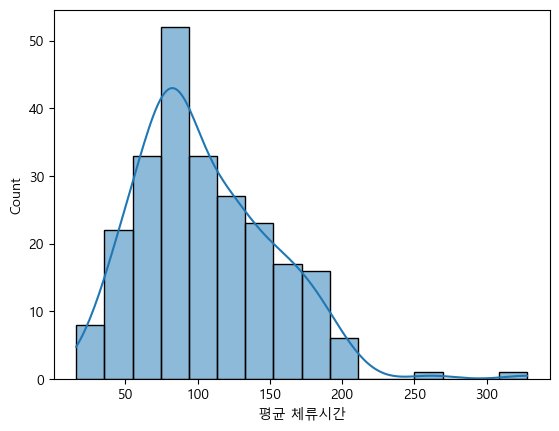

In [9]:
sns.histplot(data=basic_info['평균 체류시간'],kde=True)

<Axes: ylabel='평균 체류시간'>

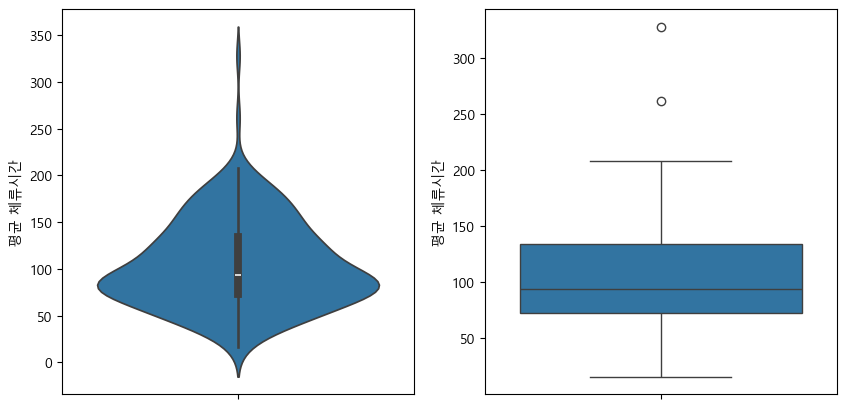

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.violinplot(data=basic_info['평균 체류시간'])

plt.subplot(1,2,2)
sns.boxplot(data=basic_info['평균 체류시간'])

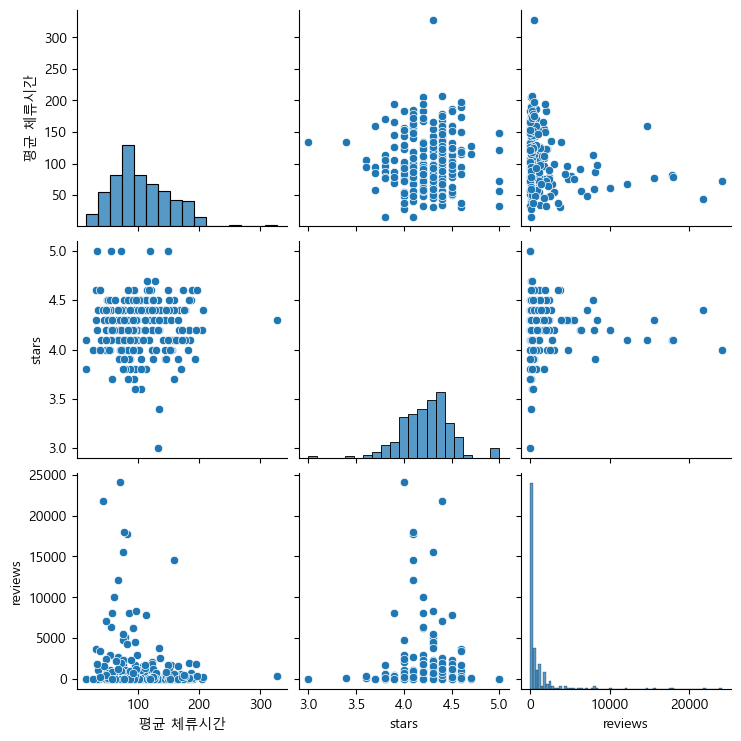

In [15]:
sns.pairplot(data=basic_info)

In [23]:
# =============================================================================================================

In [80]:
df = gender_info.groupby('관광지명').sum().reset_index()

In [81]:
df

,관광지명,연령대,남성방문 비율,여성방문 비율
0,168계단,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,48.8,51.3
1,40계단문화관광테마거리,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,53.5,46.5
2,BIFF광장,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,54.6,45.4
3,KT&G상상마당부산,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,55.2,44.9
4,SEALIFE부산아쿠아리움,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,45.8,54.2
...,...,...,...,...
234,화명수목원,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,49.5,50.6
235,화전공원,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,78.4,21.7
236,황령산,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,47.8,52.2
237,황령산전망대,70세 이상60~69세50~59세40~49세30~39세20~29세10~19세0~9세,55.0,44.9


In [86]:
df[['관광지명','남성방문 비율']].sort_values(by='남성방문 비율',ascending=False).head(10)

,관광지명,남성방문 비율
113,부산자원순환협력센터,83.1
6,가덕도등대,80.9
174,외양포포진지,80.3
235,화전공원,78.4
79,박태준기념관,77.4
88,부산국제수산물도매시장,73.0
154,안적사(부산),72.5
198,재난안전체험관,72.2
144,스포원파크,72.2
99,부산새벽시장,72.1


In [87]:
df[['관광지명','여성방문 비율']].sort_values(by='여성방문 비율',ascending=False).head(10)

,관광지명,여성방문 비율
31,금강암(부산),65.3
52,대각사(부산),61.9
127,삼광사,61.6
222,한국신발관,61.0
136,센텀APEC나루공원,58.4
223,해광사,57.9
67,마하사(부산),57.2
28,국청사(부산),57.1
216,킴스아트필드미술관,57.1
238,흰여울문화마을,56.6


In [92]:
# ===================================================================================================

In [ ]:
navi_info

In [78]:
totals = []
avgs = []

for i in range(len(navi_info)):
    total = navi_info.iloc[i][1:].sum()
    avg = navi_info.iloc[i][1:].mean()
    
    totals.append(total)
    avgs.append(avg)

In [79]:
navi_info['sum'] = totals
navi_info['avg'] = avgs

In [80]:
navi_info

,관광지명,202301,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312,sum,avg
0,168계단,26.0,30.0,23.0,12.0,14.0,15.0,25.0,12.0,3.0,16.0,14.0,13.0,203.0,16.916667
1,40계단문화관광테마거리,16.0,31.0,33.0,29.0,29.0,6.0,29.0,16.0,40.0,35.0,59.0,29.0,352.0,29.333333
2,BIFF광장,398.0,397.0,278.0,279.0,279.0,29.0,8.0,112.0,321.0,444.0,327.0,480.0,3352.0,279.333333
3,KT&G상상마당부산,1402.0,1185.0,928.0,1094.0,1642.0,3050.0,3621.0,3813.0,2545.0,2042.0,1438.0,1944.0,24704.0,2058.666667
4,SEALIFE부산아쿠아리움,4067.0,4155.0,2768.0,3603.0,5161.0,3709.0,5612.0,6673.0,3656.0,3148.0,2701.0,4588.0,49841.0,4153.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,화명수목원,602.0,766.0,1340.0,1791.0,1541.0,1555.0,1003.0,997.0,1136.0,1992.0,1923.0,664.0,15310.0,1275.833333
235,화전공원,32.0,38.0,25.0,29.0,29.0,19.0,29.0,22.0,24.0,34.0,50.0,22.0,353.0,29.416667
236,황령산,425.0,416.0,569.0,373.0,373.0,66.0,22.0,148.0,500.0,608.0,527.0,449.0,4476.0,373.000000
237,황령산전망대,2587.0,2303.0,3700.0,3144.0,2447.0,2670.0,2464.0,3278.0,3297.0,3826.0,3130.0,2780.0,35626.0,2968.833333


In [ ]:
navi_info[['관광지명','sum']].sort_values(by='sum',ascending=True)[:60]

In [ ]:
navi_info[['관광지명','avg']].sort_values(by='avg',ascending=False)[:60]

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

search_number = []
for i in basic_info['관광지명']:
    if not i.startswith('부산'):
        i = '부산 ' + i
    url = f'https://www.google.com/search?q={i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    time.sleep(2)

    search_number.append(driver.find_element(By.ID, 'result-stats').text)

basic_info['search_number'] = search_number

In [72]:
search_number = []
for index,i in enumerate(basic_info['관광지명']):
    if basic_info.iloc[index]['search_number']:
        continue
    if not i.startswith('부산'):
        i = '부산 ' + i
    url = f'https://www.google.com/search?q={i}'
    service = Service(executable_path='./data/chromedriver.exe')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    time.sleep(2)

    # search_number.append(driver.find_element(By.ID, 'result-stats').text)
    basic_info.loc[index,'search_number'] = driver.find_element(By.ID, 'result-stats').text

In [105]:
import re

pattern = re.compile(r'\([^)]*\)')

basic_info['search_number'] = basic_info['search_number'].apply(lambda x: re.sub(pattern, '', x))
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: x[7:-1])

In [109]:
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: re.sub(r'개', '', x))

In [115]:
basic_info['search_number'] = basic_info['search_number'].apply(lambda x: int(x.replace(',','')))

In [129]:
basic_info.to_csv('./data_2/basic_info_with_reviews.csv',encoding='utf-8',index=False)

===============================================================================================================

===============================================================================================================

===============================================================================================================

In [1]:
import pandas as pd

In [11]:
basic_info = pd.read_csv('./부산/basic_info.csv')
gender_info = pd.read_csv('./부산/gender_info.csv')
navi_info = pd.read_csv('./부산/navi_info.csv')
visit_info = pd.read_csv('./부산/visit_info.csv')
location_info = pd.read_csv('./부산/location_info.csv')

In [12]:
visit_info.dropna(subset=['광역지자체명'], axis=0,inplace=True)
names = visit_info['관광지명'].tolist()

local_visit = visit_info[visit_info['광역지자체명'].str.contains('부산')].groupby('관광지명')[['광역지자체별 거주 방문자 비율']].mean()
local_visit = local_visit.reset_index()

In [13]:
basic_info['광역지자체별 거주 방문자 비율'] = local_visit['광역지자체별 거주 방문자 비율']

In [14]:
totals = []
avgs = []

for i in range(len(navi_info)):
    total = navi_info.iloc[i][1:].sum()
    avg = navi_info.iloc[i][1:].mean()
    
    totals.append(total)
    avgs.append(avg)
navi_info['sum'] = totals
navi_info['avg'] = avgs

In [15]:
location_info = location_info.rename(columns={'CONT_NM': '관광지명', 'TAR_ADDR_NM': '주소', 'KTO_CATE_LCLS_NM': '대분류', 'KTO_CATE_MCLS_NM': '중분류', 'KTO_CATE_SCLS_NM': '소분류', 'XCRD' : 'longitude', 'YCRD' : 'latitude'})

In [16]:
import re

pattern = re.compile(r'\([^)]*\)')

basic_info['관광지명'] = basic_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))
location_info['관광지명'] = location_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))
visit_info['관광지명'] = visit_info['관광지명'].apply(lambda x: re.sub(pattern, '', x))

In [17]:
df = pd.DataFrame()

In [18]:
df = pd.concat([basic_info,navi_info[['sum','avg']]],axis=1)

In [19]:
df = pd.merge(df,location_info,on='관광지명',how='inner')

In [20]:
df.describe()

,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율,sum,avg,longitude,latitude
count,239.000000,233.000000,233.00000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000
mean,104.920502,4.244206,1385.04721,7.520314e+05,62.297908,16550.447699,1379.203975,129.072049,35.163086
std,46.716897,0.273031,3375.29869,2.589280e+06,14.161516,37049.609650,3087.467471,0.093770,0.076956
min,16.000000,3.000000,1.00000,6.700000e+02,20.800000,36.000000,3.000000,128.809631,35.000647
25%,73.000000,4.100000,48.00000,2.695000e+04,53.800000,542.000000,45.166667,129.027611,35.104642
50%,94.000000,4.300000,203.00000,1.090000e+05,65.700000,3183.000000,265.250000,129.062351,35.154317
75%,134.500000,4.400000,1063.00000,3.435000e+05,73.150000,12807.000000,1067.250000,129.116345,35.213901
max,328.000000,5.000000,24051.00000,3.220000e+07,87.900000,235888.000000,19657.333333,129.276526,35.376051


In [205]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [207]:
for i in range(len(df['관광지명'])):
    folium.Marker(
            [df.iloc[i]['latitude'],df.iloc[i]['longitude']],
            popup=folium.Popup(df.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [ ]:
busan_map

In [31]:
df = df.dropna()

In [26]:
import numpy as np
score = []

for i in range(len(df)):
    if pd.isna(df.iloc[i]['stars']):
        star = 0
    else:
        star = df.iloc[i]['stars'] * 1.2
    if pd.isna(df.iloc[i]['reviews']):
        review = 0
    else:
        review = np.log1p(max(df['reviews'])) - np.log1p(df.iloc[i]['reviews']) * 1.1
    search = np.log1p(max(df['search_number'])) - np.log1p(df.iloc[i]['search_number'])
    visit = np.log1p(df.iloc[i]['광역지자체별 거주 방문자 비율']) * 1.1
    time = np.log1p(df.iloc[i]['평균 체류시간']) * 0.8
    navi = np.log1p(max(df['avg'])) - np.log1p(df.iloc[i]['avg'])
    all = star+review+search+visit+time-navi
    # if not df['주소_x'].str.contains('진구|해운대|사하구|북구|동래').iloc[i]:
    #     all *= 1.1
    if df.iloc[i]['소분류'] == '산':
        score.append(all*0.9)
    elif df.iloc[i]['소분류'] == '사찰':
        score.append(all*0.9)
    else:
        score.append(all)

df['scores'] = score

In [27]:
first = df.sort_values(by='scores',ascending=False)

In [28]:
first

,관광지명,주소_x,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율,sum,avg,주소_y,대분류,중분류,소분류,longitude,latitude,scores
70,명지동근린공원,부산광역시 강서구,164,4.1,8.0,23200,62.5,6641.0,553.416667,부산광역시 강서구 명지오션시티10로 95,인문(문화/예술/역사),휴양관광지,공원,128.906657,35.087033,24.909113
215,칠암항,부산광역시 기장군,73,4.0,2.0,18000,53.6,2810.0,234.166667,부산광역시 기장군 일광면 문오성길 510,자연,자연관광지,항구/포구,129.260290,35.298622,24.586122
220,학리항,부산광역시 기장군,88,4.4,37.0,9160,56.6,8178.0,681.500000,부산광역시 기장군 일광면 일광읍 학리 251-22,자연,자연관광지,항구/포구,129.247753,35.259973,24.220685
149,아미르공원,부산광역시 영도구,154,4.0,3.0,63000,53.0,3144.0,262.000000,부산광역시 영도구 해양로301번길 55,인문(문화/예술/역사),휴양관광지,공원,129.077442,35.076293,23.708141
96,부산복천동고분군,부산광역시 동래구,183,4.0,1.0,20100,74.3,251.0,20.916667,부산광역시 동래구 복천동,인문(문화/예술/역사),역사관광지,유적지/사적지,129.090682,35.206873,23.631031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,광복로문화패션거리,부산광역시 중구,75,NaN,NaN,18900,69.8,355.0,29.583333,부산광역시 중구 광복로 72-1,인문(문화/예술/역사),체험관광지,이색거리,129.031290,35.099104,9.125137
139,송정역,부산광역시 해운대구,84,NaN,NaN,268000,47.7,3185.0,265.416667,부산광역시 해운대구 송정중앙로8번길 60,인문(문화/예술/역사),역사관광지,유적지/사적지,129.200362,35.180981,8.315904
112,부산자갈치양곱창골목,부산광역시 중구,67,NaN,NaN,12000,70.0,36.0,3.000000,부산광역시 중구 남포동5가,인문(문화/예술/역사),체험관광지,이색거리,129.027746,35.097368,7.459324
235,화전공원,부산광역시 강서구,173,NaN,NaN,176000,55.1,353.0,29.416667,부산광역시 강서구 화전산단5로 84,인문(문화/예술/역사),휴양관광지,공원,128.879162,35.105656,7.295060


In [31]:
first['관광지명'].tail(25).tolist()

['평화공원',
 '금용암',
 '부산자갈치시장',
 '부산부전시장',
 '더베이101',
 '해동용궁사',
 '40계단문화관광테마거리',
 'BIFF광장',
 '부평시장',
 '부산박물관',
 '168계단',
 '이기대',
 '부산해운대시장',
 '국제시장',
 '부산올림픽공원',
 '문화공감수정',
 '서면시장',
 '태종사',
 '영도봉래시장/봉래시장',
 '두도',
 '광복로문화패션거리',
 '송정역',
 '부산자갈치양곱창골목',
 '화전공원',
 '감천사']

In [37]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [38]:
for i in range(len(first)):
    if i == 30:
        break
    folium.Marker(
            [first.iloc[i]['latitude'],first.iloc[i]['longitude']],
            popup=folium.Popup(first.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [ ]:
busan_map

==============================================================================

==============================================================================

==============================================================================

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm

In [9]:
basic_info = pd.read_csv('./부산/basic_info.csv')
gender_info = pd.read_csv('./부산/gender_info.csv')
navi_info = pd.read_csv('./부산/navi_info.csv')
visit_info = pd.read_csv('./부산/visit_info.csv')
location_info = pd.read_csv('./부산/location_info.csv')

In [19]:
# 네이버 블로그 글 가져오기

# url을 soup로 만들기
def url_to_soup(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html,'html.parser')
    return soup

# 블로그 리뷰
blog_review = []

for i in tqdm(basic_info['관광지명']):
    # 각 여행지 검색
    url = f'https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query={i}'
    soup = url_to_soup(url)
    
    # 각 블로그별 url 가져오기
    titles = soup.findAll('div', class_ = 'title_area')
    urls = []
    for title in titles:
        links = title.find('a',class_='title_link')
        link = links.get('href')
        urls.append(link)

    # 블로그별 리뷰 가져오기
    reviews = []
    for blog_url in urls[:25]:
        soup = url_to_soup(blog_url)
        if soup.find('iframe'):
            src = soup.find('iframe').get('src')
            head = 'https://blog.naver.com/'
            real_url = head + src
            
            soup = url_to_soup(real_url)
            main_container = soup.find('div', attrs={'class': 'se-main-container'})
            
            if main_container:
                review = main_container.get_text().replace('\n', '')
                reviews.append(review)
            else:
                print(f"Couldn't find the 'se-main-container' class on {real_url}")
    
    blog_review.append(reviews)

  0%|          | 0/239 [00:00<?, ?it/s]

Couldn't find the 'se-main-container' class on https://blog.naver.com//proxy/plusmapViewer.php?id=maps_1674737087280
Couldn't find the 'se-main-container' class on https://blog.naver.com//proxy/plusmapViewer.php?id=emap_848455&mapGb=V
Couldn't find the 'se-main-container' class on https://blog.naver.com/https://play-tv.kakao.com/embed/player/cliplink/435800117?service=daum_tistory
Couldn't find the 'se-main-container' class on https://blog.naver.com///leechee.tistory.com/api
Couldn't find the 'se-main-container' class on https://blog.naver.com/https://www.youtube.com/embed/IbibX0S64LI
Couldn't find the 'se-main-container' class on https://blog.naver.com/https://play-tv.kakao.com/embed/player/cliplink/444256060?service=daum_tistory
Couldn't find the 'se-main-container' class on https://blog.naver.com//PostView.naver?blogId=winyohu&logNo=222861493263&redirect=Dlog&widgetTypeCall=true&directAccess=false
Couldn't find the 'se-main-container' class on https://blog.naver.com///photoguide.tis

In [ ]:
for i,num in enumerate(blog_review):
    if len(num) < 25:
        print(i,len(num))

In [26]:
df = pd.DataFrame()

In [31]:
df['관광지명'] = basic_info['관광지명']
df['블로그리뷰'] = blog_review

In [36]:
df.to_csv('./부산/blog_review.csv',encoding='utf-8',index=False)

In [43]:
basic_info

,관광지명,주소,평균 체류시간,stars,reviews,search_number
0,168계단,부산광역시 동구,184,4.2,1948.0,253000
1,40계단문화관광테마거리,부산광역시 중구,96,3.8,1705.0,134000
2,BIFF광장,부산광역시 중구,82,4.1,17771.0,107000
3,KT&G상상마당부산,부산광역시 부산진구,88,4.5,280.0,293000
4,SEALIFE부산아쿠아리움,부산광역시 해운대구,59,4.2,8067.0,76200
...,...,...,...,...,...,...
234,화명수목원,부산광역시 북구,68,4.4,1282.0,245000
235,화전공원,부산광역시 강서구,173,NaN,NaN,176000
236,황령산,부산광역시 부산진구,121,5.0,5.0,249000
237,황령산전망대,부산광역시 남구,38,4.6,3512.0,118000


In [81]:
bus = pd.read_csv('./부산/교통량데이터.csv')

In [82]:
top = ['명지동근린공원', '칠암항', '학리항', '아미르공원', '부산복천동고분군', '만덕고개누리길전망데크', '구덕민속예술관', '부산충렬사', '재한유엔기념공원', '우장춘기념관', '영도하리선착장', '킴스아트필드미술관', '임랑해수욕장', '소두방공원', '장림골목시장', '구포어린이교통공원', '대저수문생태공원', '외양포포진지', '한국기독교선교박물관', '연동시장', '박태준기념관', '송정해수욕장', '우암동도시숲', '부산부평족발골목', '다대포해수욕장', '부산어촌민속관', '황령산', '다대포항', '김민부전망대', '청학수변공원']
bottom = ['부산기장시장', '부산현대미술관', '대신공원', '청사포', '부산시민공원', '평화공원', '금용암', '부산자갈치시장', '부산부전시장', '더베이101', '해동용궁사', '40계단문화관광테마거리', 'BIFF광장', '부평시장', '부산박물관', '168계단', '이기대', '부산해운대시장', '국제시장', '부산올림픽공원', '문화공감수정', '서면시장', '태종사', '두도', '감천사', '광복로문화패션거리', '부산자갈치양곱창골목', '송정역', '영도봉래시장/봉래시장', '화전공원']

In [83]:
for i in range(len(bus)):
    if bus.iloc[i]['관광지명'] in top:
        bus.loc[i,'구분'] = '숨은 명소'
    else:
        bus.loc[i,'구분'] = '명소'

In [84]:
print('숨은 명소', bus[bus['구분']=='숨은 명소']['정류장 갯수'].sum() / len(bus[bus['구분']=='숨은 명소']))
print('명소', bus[bus['구분']=='명소']['정류장 갯수'].sum() / len(bus[bus['구분']=='명소']))

숨은 명소 4.2
명소 11.333333333333334


In [85]:
print('숨은 명소', bus[bus['구분']=='숨은 명소']['총 승객수'].sum() / len(bus[bus['구분']=='숨은 명소']))
print('명소', bus[bus['구분']=='명소']['총 승객수'].sum() / len(bus[bus['구분']=='명소']))

숨은 명소 7911.333333333333
명소 51855.066666666666


In [86]:
from scipy import stats

test_names = ['총 승객수','정류장 갯수']

p = bus[bus['구분'] == '명소'][['총 승객수','정류장 갯수']]
up = bus[bus['구분'] == '숨은 명소'][['총 승객수','정류장 갯수']]

for test_name in test_names:
    statistic,p_value = stats.levene(p[test_name], up[test_name])
    if p_value > 0.05:
        print(f"{test_name} p-value: {p_value}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value}, 이분산 가정 만족")

총 승객수 p-value: 0.05131072688034413, 등분산 가정 만족
정류장 갯수 p-value: 0.017501203794837543, 이분산 가정 만족


In [87]:
for test_name in test_names[0:1]:
    t_statistic,pvalue = stats.ttest_ind(
        a = p[test_name],
        b = up[test_name],
        alternative = 'two-sided',  # 양측검정, 기본적
        equal_var = True
)
    if pvalue<0.05:
        print(test_name,pvalue,'귀무가설 기각')
    else:
        print(test_name,pvalue,'귀무가설 기각 불가')
    break

총 승객수 0.027281266069135418 귀무가설 기각


In [88]:
for test_name in test_names[1:]:
    t_statistic,pvalue = stats.ttest_ind(
        a = p[test_name],
        b = up[test_name],
        alternative = 'two-sided',  # 양측검정, 기본적
        equal_var = False
)
    if pvalue<0.05:
        print(test_name,pvalue,'귀무가설 기각')
    else:
        print(test_name,pvalue,'귀무가설 기각 불가')

정류장 갯수 0.02063576808992917 귀무가설 기각
